In [2]:
import pandas as pd
import re
import string
from tqdm import tqdm
from collections import Counter
import numpy as np

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from IPython.display import clear_output
!pip install twarc #Twarc
!pip install tweepy # Tweepy 3.8.0
!pip install argparse #Argparse 3.2
!pip install xtract #Xtract 0.1 a3
!pip install wget #Wget 3.2
clear_output()

In [4]:
import gzip
import shutil
import os
import wget
import csv
import linecache
from shutil import copyfile
import ipywidgets as widgets

In [5]:
import seaborn as sns


In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
path = "/content/drive/MyDrive/Course_3/"
# data = path+'ver22_full_dataset_clean.tsv.gz'
# df = pd.read_csv(path+'исходник0.csv')

In [ ]:
# with gzip.open(data, 'rb') as f_in:
#     with open('/content/drive/MyDrive/Course_3/dataset22.tsv', 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

### Нужные языки

In [ ]:
# iter_csv = pd.read_csv(path+'en_ru_dataset.tsv', sep="\t", iterator=True, chunksize=2000)
# df_en = pd.concat([chunk.loc[(chunk['lang'] == 'en')] for chunk in iter_csv])
# df_en.to_csv(path+'en_dataset.tsv', sep="\t", index=False)


# #потребовалось 10 минут

In [ ]:
df_en = pd.read_csv(path+'en_dataset.tsv', sep="\t")
# df_en = df_en.drop(columns=['Unnamed: 0'])
# df_en.to_csv(path+'en_dataset.tsv', sep="\t", index=False)

df_en

,tweet_id,date,time,lang,country_place
0,1213330173736738817,2020-01-04,05:23:50,en,NaN
1,1214195710301618178,2020-01-06,14:43:10,en,NaN
2,1214198629553950721,2020-01-06,14:54:46,en,NaN
3,1214917256414662656,2020-01-08,14:30:20,en,NaN
4,1214936881563082752,2020-01-08,15:48:19,en,NaN
...,...,...,...,...,...
81083858,1292309714483720201,2020-08-09,04:00:20,en,NaN
81083859,1292309715238649856,2020-08-09,04:00:20,en,NaN
81083860,1292309715259711488,2020-08-09,04:00:20,en,NaN
81083861,1292309715473629190,2020-08-09,04:00:20,en,NaN


In [ ]:
# iter_csv = pd.read_csv(path+'en_ru_dataset.tsv', sep="\t", iterator=True, chunksize=2000)
# df_ru = pd.concat([chunk.loc[(chunk['lang'] == 'ru')] for chunk in iter_csv])
# df_ru.to_csv(path+'ru_dataset.tsv', sep="\t", index=False)
#потр 7 мин

In [ ]:
df_ru = pd.read_csv(path+'ru_dataset.tsv', sep="\t")

# df_ru = df_ru.drop(columns=['Unnamed: 0'])
# df_ru.to_csv(path+'ru_dataset.tsv', sep="\t", index=False)



Отфильтровали твиты только для русского и английского

### Смотрим на календарь

In [ ]:
df0 = df_en[1000000:51000000]
df0.loc[:,'date'] = pd.to_datetime(df0['date'], format='%Y-%m-%d')

In [ ]:
df0

,tweet_id,date,time,lang,country_place
1000000,1224275421971136513,2020-02-03,10:16:21,en,NaN
1000001,1224275426786152448,2020-02-03,10:16:22,en,NaN
1000002,1224275427780452352,2020-02-03,10:16:22,en,NaN
1000003,1224275427969003520,2020-02-03,10:16:22,en,NaN
1000004,1224275428950585345,2020-02-03,10:16:22,en,NaN
...,...,...,...,...,...
50999995,1267789809134665729,2020-06-02,12:06:59,en,NaN
50999996,1267789810657382403,2020-06-02,12:06:59,en,NaN
50999997,1267789811483475968,2020-06-02,12:07:00,en,NaN
50999998,1267789811601084416,2020-06-02,12:07:00,en,NaN


Text(0.5, 0, 'date')

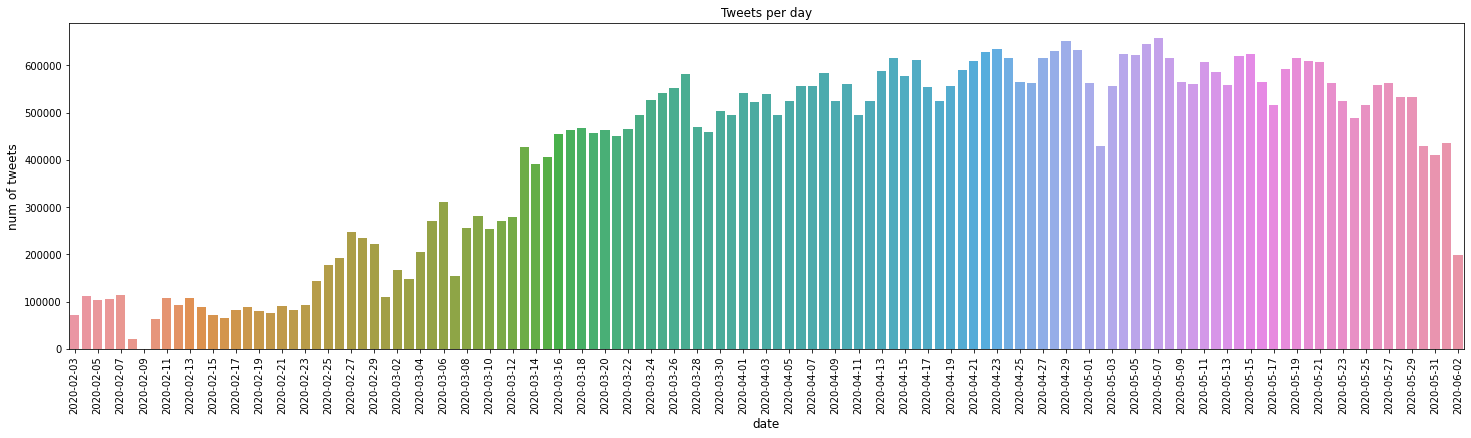

In [ ]:
fig, ax = plt.subplots(figsize=(25,6))

dates = df0.date.dt.date
graph = sns.countplot(x=dates, data=df0.tweet_id)

new_ticks = [i.get_text() for i in graph.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 2), new_ticks[::2], rotation=90)

plt.title('Tweets per day', fontsize=12)
plt.ylabel('num of tweets', fontsize=12)
plt.xlabel('date', fontsize=12)
plt.savefig(path+'num_en_tweets.png')

Основная масса твитов начинается а марте, и падает к июню.

In [ ]:
df0 = df0[(df0['date'] > '2020-03-02') & (df0['date'] < '2020-06-01')]
df0

,tweet_id,date,time,lang,country_place
4210452,1234629604448575489,2020-03-03,00:00:10,en,NaN
4210453,1234629642193117184,2020-03-03,00:00:19,en,NaN
4210454,1234629793154551810,2020-03-03,00:00:55,en,NaN
4210455,1234629969323577345,2020-03-03,00:01:37,en,NaN
4210456,1234630095169609729,2020-03-03,00:02:07,en,NaN
...,...,...,...,...,...
50364466,1267244452814491648,2020-05-31,23:59:56,en,NaN
50364467,1267244454601060357,2020-05-31,23:59:56,en,NaN
50364468,1267244458426368000,2020-05-31,23:59:57,en,US
50364469,1267244462201282560,2020-05-31,23:59:58,en,NaN


In [ ]:
df0.to_csv(path+'spring_en.tsv', sep="\t", index=False)


In [ ]:
df_ru.loc[:,'date'] = pd.to_datetime(df_ru['date'], format='%Y-%m-%d')


df_ru

,tweet_id,date,time,lang,country_place
0,1212470713338286081,2020-01-01,20:28:39,ru,NaN
1,1212537749485449216,2020-01-02,00:55:01,ru,NaN
2,1212640596508237824,2020-01-02,07:43:42,ru,DE
3,1212707879872016384,2020-01-02,12:11:04,ru,NaN
4,1213076662818091008,2020-01-03,12:36:28,ru,RU
...,...,...,...,...,...
1959965,1292305122106707968,2020-08-09,03:42:05,ru,NaN
1959966,1292305579013287936,2020-08-09,03:43:54,ru,NaN
1959967,1292306243609137152,2020-08-09,03:46:33,ru,NaN
1959968,1292307567490760704,2020-08-09,03:51:48,ru,NaN


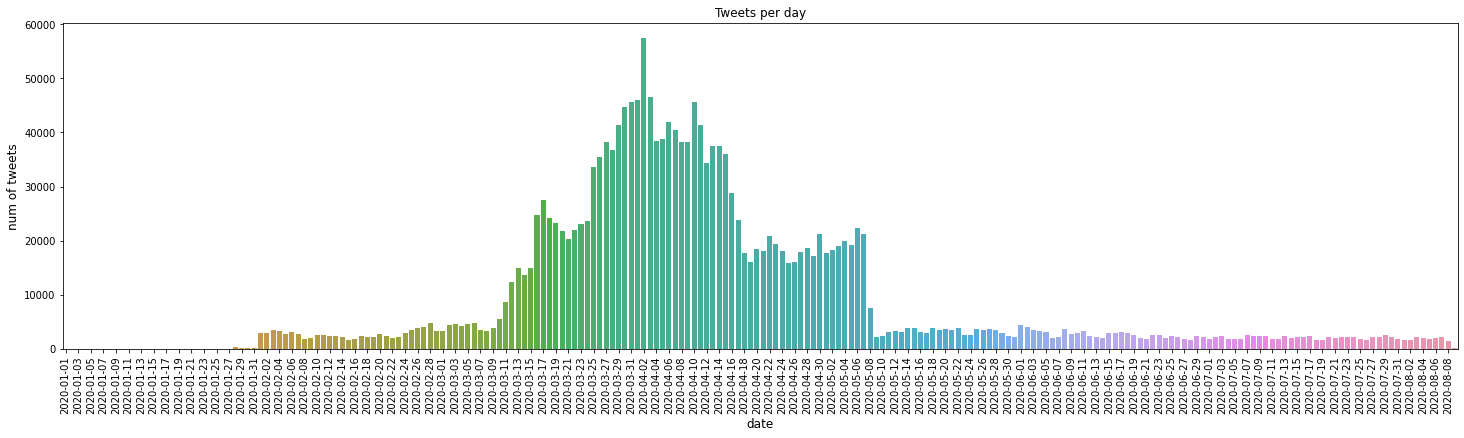

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,6))

dates = df_ru.date.dt.date
graph = sns.countplot(x=dates, data=df_ru.tweet_id)

new_ticks = [i.get_text() for i in graph.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 2), new_ticks[::2], rotation=90)

plt.title('Tweets per day', fontsize=12)
plt.ylabel('num of tweets', fontsize=12)
plt.xlabel('date', fontsize=12)
plt.savefig(path+'num_ru_tweets.png')

Видно что имеет смысл брать твиты где-то с начала марта по май, т.к. в остальные периоды их количество достаточно мало.

In [ ]:
df_ru = df_ru[(df_ru['date'] > '2020-03-02') & (df_ru['date'] < '2020-06-01')]
df_ru.to_csv(path+'spring_ru.tsv', sep="\t", index=False)


### Twitter keys

In [8]:
import json
import tweepy
from tweepy import OAuthHandler

# Authenticate
CONSUMER_KEY = "NmZuR0vtf6mUfQLBfS0FWSsj4" #@param {type:"string"}
CONSUMER_SECRET_KEY = "riCzt2cqkQzzLjNiEehmshUHZ4EX4rqdGyEGVuP3jtPCfp05hu" #@param {type:"string"}
ACCESS_TOKEN_KEY = "3001696600-uBcT525hDYwl6ob8AGHlJZgzDsT7M5JDNA9D2U1" #@param {type:"string"}
ACCESS_TOKEN_SECRET_KEY = "yJWblpKxwtDrpmq6zEAegr3tMSJ4ghd3oaPyEsbkiRamV" #@param {type:"string"}

#Creates a JSON Files with the API credentials
with open(path+'api_keys.json', 'w') as outfile:
    json.dump({
    "consumer_key":CONSUMER_KEY,
    "consumer_secret":CONSUMER_SECRET_KEY,
    "access_token":ACCESS_TOKEN_KEY,
    "access_token_secret": ACCESS_TOKEN_SECRET_KEY
     }, outfile)

#The lines below are just to test if the twitter credentials are correct
# Authenticate
auth = tweepy.AppAuthHandler(CONSUMER_KEY, CONSUMER_SECRET_KEY)

api = tweepy.API(auth, wait_on_rate_limit=True,
				   wait_on_rate_limit_notify=True)

if (not api):
   print ("Can't Authenticate")
   sys.exit(-1)


In [9]:
!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_acquisition/get_metadata.py -O get_metadata.py



--2021-10-01 06:47:06--  https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_acquisition/get_metadata.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7205 (7.0K) [text/plain]
Saving to: ‘get_metadata.py’

get_metadata.py     100%[===================>]   7.04K  --.-KB/s    in 0s      

2021-10-01 06:47:06 (60.8 MB/s) - ‘get_metadata.py’ saved [7205/7205]



в файле матадата пришлось убрать кодирование в utf-8, потому что это давало текстам твитов странный формат, от которого было непросто избавиться


### Сокращаем

Данных очень много, и они очень долго дотсают твиты, поэтому мы возьмем по 120к тивтов на наглийском и русском

In [10]:
rus = pd.read_csv(path+'spring_ru.tsv', sep="\t")
rus

,tweet_id,date,time,lang,country_place
0,1234629647960330241,2020-03-03,00:00:21,ru,NaN
1,1234629803845804032,2020-03-03,00:00:58,ru,NaN
2,1234629821520646145,2020-03-03,00:01:02,ru,NaN
3,1234630284039118849,2020-03-03,00:02:52,ru,NaN
4,1234630405346729986,2020-03-03,00:03:21,ru,NaN
...,...,...,...,...,...
1710537,1267241958583365632,2020-05-31,23:50:01,ru,NaN
1710538,1267241958822440960,2020-05-31,23:50:01,ru,NaN
1710539,1267241959241871360,2020-05-31,23:50:01,ru,NaN
1710540,1267243277184643075,2020-05-31,23:55:16,ru,NaN


In [11]:
eng = pd.read_csv(path+'spring_en.tsv', sep="\t")


In [12]:
n = 200000
rus_sample = rus.sample(n, random_state=42)
eng_sample = eng.sample(n, random_state=42)

rus_sample.to_csv(path+'rus_sample.tsv', sep="\t", index=False)
eng_sample.to_csv(path+'eng_sample.tsv', sep="\t", index=False)

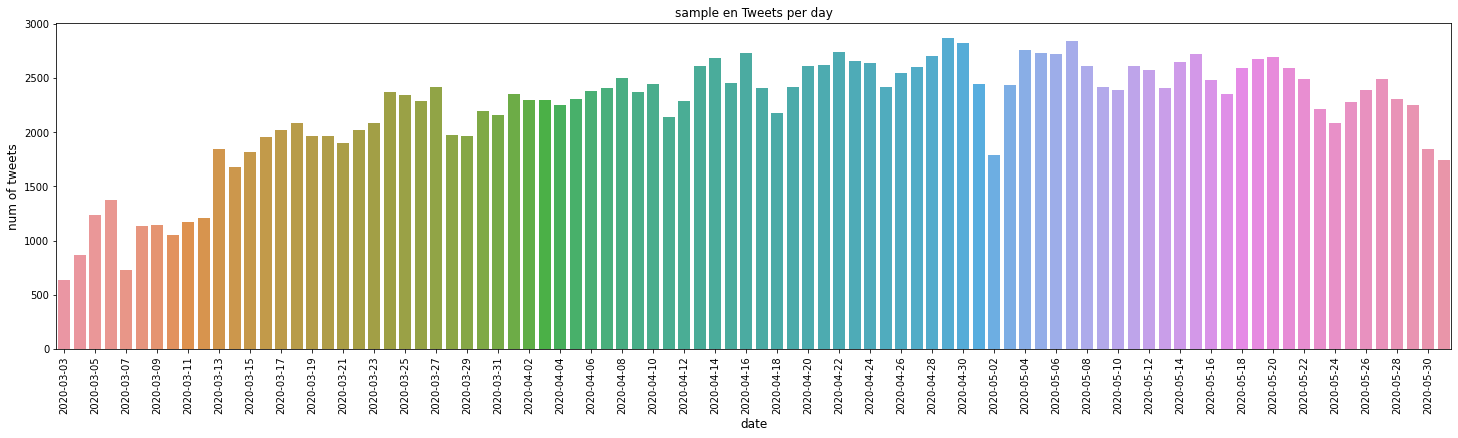

In [18]:
eng_sample.loc[:,'date'] = pd.to_datetime(eng_sample['date'], format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(25,6))

dates = eng_sample.date.dt.date
order = sorted(dates.value_counts().index)

graph = sns.countplot(x=dates, data=eng_sample.tweet_id, order=order)

new_ticks = [i.get_text() for i in graph.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 2), new_ticks[::2], rotation=90)

plt.title('sample en Tweets per day', fontsize=12)
plt.ylabel('num of tweets', fontsize=12)
plt.xlabel('date', fontsize=12)
plt.savefig(path+'sample_en_tweets.png')

### Достаем твиты

In [19]:
!python get_metadata.py -i /content/drive/MyDrive/Course_3/rus_sample.tsv -o /content/drive/MyDrive/Course_3/Text/hydratued_tweets_ru -k /content/drive/MyDrive/Course_3/api_keys.json

Your twitter api credentials are valid.
/content/drive/MyDrive/Course_3/Text/hydratued_tweets_ru
tab seperated file, using \t delimiter
total ids: 200000
metadata collection complete
creating master json file
currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400
currently getting 400 - 500
currently getting 500 - 600
currently getting 600 - 700
currently getting 700 - 800
currently getting 800 - 900
currently getting 900 - 1000
currently getting 1000 - 1100
currently getting 1100 - 1200
currently getting 1200 - 1300
currently getting 1300 - 1400
currently getting 1400 - 1500
currently getting 1500 - 1600
currently getting 1600 - 1700
currently getting 1700 - 1800
currently getting 1800 - 1900
currently getting 1900 - 2000
currently getting 2000 - 2100
currently getting 2100 - 2200
currently getting 2200 - 2300
currently getting 2300 - 2400
currently getting 2400 - 2500
currently getting 2500 - 2600
currently getting 2600 - 2700
cu

In [12]:
!python get_metadata.py -i /content/drive/MyDrive/Course_3/eng_sample.tsv -o /content/drive/MyDrive/Course_3/Text/hydratued_tweets_en -k /content/drive/MyDrive/Course_3/api_keys.json

Your twitter api credentials are valid.
/content/drive/MyDrive/Course_3/Text/hydratued_tweets_en
tab seperated file, using \t delimiter
total ids: 200000
metadata collection complete
creating master json file
currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400
currently getting 400 - 500
currently getting 500 - 600
currently getting 600 - 700
currently getting 700 - 800
currently getting 800 - 900
currently getting 900 - 1000
currently getting 1000 - 1100
currently getting 1100 - 1200
currently getting 1200 - 1300
currently getting 1300 - 1400
currently getting 1400 - 1500
currently getting 1500 - 1600
currently getting 1600 - 1700
currently getting 1700 - 1800
currently getting 1800 - 1900
currently getting 1900 - 2000
currently getting 2000 - 2100
currently getting 2100 - 2200
currently getting 2200 - 2300
currently getting 2300 - 2400
currently getting 2400 - 2500
currently getting 2500 - 2600
currently getting 2600 - 2700
cu

Имеем два датасета

In [10]:
tweets_ru = pd.read_csv(path+'Text/hydratued_tweets_ru.csv')
tweets_ru

,favorite_count,source,text,in_reply_to_screen_name,is_retweet,created_at,retweet_count,id_str
0,0,Twitter for Android,@lentaruofficial Что значит после окончания са...,lentaruofficial,False,Sun May 03 10:49:33 +0000 2020,0,1256898686115864582
1,0,Twitter for Android,А помните в Ухане мужчина с короновирусом в ра...,NaN,False,Wed Apr 22 12:50:58 +0000 2020,1,1252942974377496576
2,17,Twitter for iPhone,"выходила выкинуть мусор под домом, а дед-сосед...",NaN,False,Wed Apr 15 18:30:08 +0000 2020,0,1250491613383725057
3,0,Twitter for Android,"Меня бесит слово ""коронавирус"" уже с самого ег...",NaN,False,Tue May 05 09:08:05 +0000 2020,0,1257597927964446720
4,3,Twitter for Android,топ коммент обсуждения что раскупают в магазин...,NaN,False,Tue Mar 17 09:06:58 +0000 2020,0,1239840640286044161
...,...,...,...,...,...,...,...,...
160946,0,Twitter Web App,@promadm @SamMobilePriem @Gennadi070786 @D_Aza...,promadm,False,Wed Apr 15 04:44:36 +0000 2020,0,1250283862522916866
160947,0,Twitter for Android,"Так в России, это нормально, когда долбоебы пр...",NaN,False,Wed Apr 15 10:25:34 +0000 2020,0,1250369668122054656
160948,4,Twitter for iPhone,Коротко о ситуации с короновирусом в моем горо...,NaN,False,Sun Mar 15 17:09:07 +0000 2020,0,1239237201290018816
160949,12,Twitter for Android,"Шел какой там день карантина, я почти купила с...",NaN,False,Wed Apr 22 19:15:04 +0000 2020,0,1253039638316486658


In [11]:
tweets_ru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160951 entries, 0 to 160950
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   favorite_count           160951 non-null  int64 
 1   source                   160951 non-null  object
 2   text                     160951 non-null  object
 3   in_reply_to_screen_name  59210 non-null   object
 4   is_retweet               160951 non-null  bool  
 5   created_at               160951 non-null  object
 6   retweet_count            160951 non-null  int64 
 7   id_str                   160951 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 8.7+ MB


In [ ]:
tweets_ru = tweets_ru.drop(columns=['favorite_count', 'source', 'in_reply_to_screen_name', 'is_retweet', 'retweet_count'])
tweets_ru

,text,created_at,id_str
0,@lentaruofficial Что значит после окончания са...,Sun May 03 10:49:33 +0000 2020,b'1256898686115864582'
1,А помните в Ухане мужчина с короновирусом в ра...,Wed Apr 22 12:50:58 +0000 2020,b'1252942974377496576'
2,"выходила выкинуть мусор под домом, а дед-сосед...",Wed Apr 15 18:30:08 +0000 2020,b'1250491613383725057'
3,"Меня бесит слово ""коронавирус"" уже с самого ег...",Tue May 05 09:08:05 +0000 2020,b'1257597927964446720'
4,топ коммент обсуждения что раскупают в магазин...,Tue Mar 17 09:06:58 +0000 2020,b'1239840640286044161'
...,...,...,...
96546,шведы наперекор всяким там рекомендующим конто...,Sat Apr 11 07:24:52 +0000 2020,b'1248874641558511618'
96547,"@Vremya_Pokazhet Так , а почему мэр Липецка бе...",Tue Apr 07 10:17:01 +0000 2020,b'1247468414148509697'
96548,"@ge5KTXltwCeLdYl @kolydka2 Симптомы лечить, пн...",Sun Mar 22 14:19:42 +0000 2020,b'1241731283354607617'
96549,"И ведь дома сидеть опасно. Стою на балконе, ку...",Tue Mar 31 09:56:16 +0000 2020,b'1244926478418092032'


In [13]:
tweets_en = pd.read_csv(path+'Text/hydratued_tweets_en.csv')
tweets_en = tweets_en.drop(columns=['favorite_count', 'source', 'in_reply_to_screen_name', 'is_retweet', 'retweet_count'])
tweets_en

,favorite_count,source,text,in_reply_to_screen_name,is_retweet,created_at,retweet_count,id_str
0,0,TweetDeck,umair haque asks if life will go back to norma...,NaN,False,Mon May 11 17:13:00 +0000 2020,0,1259894286285496322
1,0,Twitter for iPhone,“Do as I say not as I do” miniTrump https://t....,NaN,False,Thu Apr 30 01:40:43 +0000 2020,0,1255673406143500288
2,0,WordPress.com,Cities under lockdown amid Covid-19 scare: Sce...,NaN,False,Mon Mar 23 08:49:20 +0000 2020,0,1242010532112216064
3,0,Twitter for iPhone,#SackBorisAndDom #COVID19 #Conservative #KierS...,NaN,False,Mon May 25 18:05:05 +0000 2020,0,1264980823956246531
4,0,Twitter Web Client,"No, Governor Kemp, I won’t open my Georgia res...",NaN,False,Fri Apr 24 17:21:24 +0000 2020,0,1253735808961478657
...,...,...,...,...,...,...,...,...
152816,0,Twitter Web App,IF only that was trumps intention https://t.co...,NaN,False,Sat Apr 25 08:49:28 +0000 2020,0,1253969364228898816
152817,0,Twitter for iPhone,Lizzo out there having the time of her life in...,NaN,False,Wed Mar 18 22:30:46 +0000 2020,0,1240405312089227265
152818,2,Twitter Web App,Day Job: Cory Booker’s Top Aide. His Night One...,NaN,False,Thu May 07 15:27:58 +0000 2020,2,1258418305003487233
152819,0,Twitter Web App,Remember: F*CK @speakvos @SenFitzgerald @mkego...,NaN,False,Sun Apr 12 23:42:11 +0000 2020,0,1249482980629917701
